# Scikit-Learn

[Scikit-learn](http://scikit-learn.org/stable/) is a python-based machine learning library providing implementations of a great many algorithms for supervised and unsupervised learning. In large part, it builds upon the cabilities of NumPy, SciPy, matplotlib, and Pandas. 

In the context of supervised learning, the primary objects scikit-learn defines are called **estimators**. Each of these defines a `fit` method, which develops a model from provided training data, and a `predict` method, which uses the model to map a new instance to a suitable target value. Scikit-learn also defines multiple utilities for partitioning and manipulating data sets as well as  evaluating models. 

Below, we cover some of the basic steps needed to create a model in scikit-learn.  These notes are based on material appearing in the *scikit-learn tutorials*.

*  http://scikit-learn.org/stable/tutorial/index.html

## Builtin Datasets

Scikit-learn comes bundled with several pre-defined (typically small) `datasets` that users can explore. 

    load_boston()	Load and return the boston house-prices dataset (regression).
    load_iris()	Load and return the iris dataset (classification).
    load_diabetes()	Load and return the diabetes dataset (regression).
    load_digits()	Load and return the digits dataset (classification).
    load_linnerud()	Load and return the linnerud dataset (multivariate regression).
    load_wine()	Load and return the wine dataset (classification).
    load_breast_cancer()	Load and return the breast cancer wisconsin dataset (classification).

The iris dataset is loaded below, and a description of it is printed. 

In [3]:
from sklearn import datasets
import sklearn.tree as tree
import numpy as np
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The data sets we typically deal with are tabular. In scikit-learn, the input attributes (features) and the targets are stored in separate arrays. E.g., the `iris` data sets consists of 150 separate observations of 5 attributes. This, however, is split into arrays of shape (150,4) and (150,), respectively. The first is a 2d array, and the second is 1d. 

We can access the input and targets using `iris.data` and `iris.target`, respectively. Note that these are stored in NumPy `ndarray` objects. 

In [5]:
print("input datatype=",type(iris.data))
print("input shape (2d array)=",iris.data.shape)
print("\ninput features:")
for name in iris.feature_names:
    print("\t",name)

print("\ntarget datatype=", type(iris.target))
print("target shape (2d array)=",iris.target.shape)
print("\ntarget values:")
for name in iris.target_names:
    print("\t",name)

input datatype= <class 'numpy.ndarray'>
input shape (2d array)= (150, 4)

input features:
	 sepal length (cm)
	 sepal width (cm)
	 petal length (cm)
	 petal width (cm)

target datatype= <class 'numpy.ndarray'>
target shape (2d array)= (150,)

target values:
	 setosa
	 versicolor
	 virginica


In [6]:
for i in range(20):
    print(iris.data[i],"target:",iris.target[i])
    
print("target values: ", np.unique(iris.target))

for i in  np.unique(iris.target):
    print("number of class", i, "=",np.sum(iris.target == 1))

[5.1 3.5 1.4 0.2] target: 0
[4.9 3.  1.4 0.2] target: 0
[4.7 3.2 1.3 0.2] target: 0
[4.6 3.1 1.5 0.2] target: 0
[5.  3.6 1.4 0.2] target: 0
[5.4 3.9 1.7 0.4] target: 0
[4.6 3.4 1.4 0.3] target: 0
[5.  3.4 1.5 0.2] target: 0
[4.4 2.9 1.4 0.2] target: 0
[4.9 3.1 1.5 0.1] target: 0
[5.4 3.7 1.5 0.2] target: 0
[4.8 3.4 1.6 0.2] target: 0
[4.8 3.  1.4 0.1] target: 0
[4.3 3.  1.1 0.1] target: 0
[5.8 4.  1.2 0.2] target: 0
[5.7 4.4 1.5 0.4] target: 0
[5.4 3.9 1.3 0.4] target: 0
[5.1 3.5 1.4 0.3] target: 0
[5.7 3.8 1.7 0.3] target: 0
[5.1 3.8 1.5 0.3] target: 0
target values:  [0 1 2]
number of class 0 = 50
number of class 1 = 50
number of class 2 = 50


## Estimators

Learning and prediction in scikit-learn takes place using so-called estimator objects. Each esitmator implements two methods, `fit` and `predict`.
Below, we train a decision tree estimator on all but the last instance of the data set, and then use the developed model to classify the last instance. 

### Decision Trees

  * **See:** http://scikit-learn.org/stable/modules/tree.html

In [7]:
# from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(iris.data[:-1], iris.target[:-1])  
print("Instance:", iris.data[-1])
print("Predicted:", dtree.predict([iris.data[-1]]))
print("Actual:", iris.target[-1])

Instance: [5.9 3.  5.1 1.8]
Predicted: [2]
Actual: 2


Below, we'll train on all but the last 50. This is a horrible idea in this case, because the data in `iris` is sorted by class. And so by training on the first 100 examples, we miss class 2 completely. 

In [8]:
iris_x = iris.data.copy()
iris_y = iris.target.copy()
iris_x_train = iris_x[:-50]
iris_y_train = iris_y[:-50]
iris_x_test  = iris_x[-50:]
iris_y_test  = iris_y[-50:]
dtree.fit(iris_x_train, iris_y_train) 
#dtree.predict(iris_x_test)

count = 0
for i in range(50):
    print("Instance:", iris_x_test[i], "Predicted:", dtree.predict([iris_x_test[i]]), "Actual:", iris_y_test[i])
    if dtree.predict([iris_x_test[i]])[0] != iris_y_test[i]:
        count = count + 1

print("\nincorrect classifications: ", count)
print("manual accuracy calculation: ", (1-count/50))

from sklearn.metrics import accuracy_score
print("built-in accuracy calculation 1:", accuracy_score(dtree.predict(iris_x_test), iris_y_test))
print("built-in accuracy calculation 2:", dtree.score(iris_x_test, iris_y_test))

Instance: [6.3 3.3 6.  2.5] Predicted: [1] Actual: 2
Instance: [5.8 2.7 5.1 1.9] Predicted: [1] Actual: 2
Instance: [7.1 3.  5.9 2.1] Predicted: [1] Actual: 2
Instance: [6.3 2.9 5.6 1.8] Predicted: [1] Actual: 2
Instance: [6.5 3.  5.8 2.2] Predicted: [1] Actual: 2
Instance: [7.6 3.  6.6 2.1] Predicted: [1] Actual: 2
Instance: [4.9 2.5 4.5 1.7] Predicted: [1] Actual: 2
Instance: [7.3 2.9 6.3 1.8] Predicted: [1] Actual: 2
Instance: [6.7 2.5 5.8 1.8] Predicted: [1] Actual: 2
Instance: [7.2 3.6 6.1 2.5] Predicted: [1] Actual: 2
Instance: [6.5 3.2 5.1 2. ] Predicted: [1] Actual: 2
Instance: [6.4 2.7 5.3 1.9] Predicted: [1] Actual: 2
Instance: [6.8 3.  5.5 2.1] Predicted: [1] Actual: 2
Instance: [5.7 2.5 5.  2. ] Predicted: [1] Actual: 2
Instance: [5.8 2.8 5.1 2.4] Predicted: [1] Actual: 2
Instance: [6.4 3.2 5.3 2.3] Predicted: [1] Actual: 2
Instance: [6.5 3.  5.5 1.8] Predicted: [1] Actual: 2
Instance: [7.7 3.8 6.7 2.2] Predicted: [1] Actual: 2
Instance: [7.7 2.6 6.9 2.3] Predicted: [1] Act

Really, we need to shuffle the data before it is fed to the decision tree learner. We can do this using `np.random.permutation`

In [6]:
iris_x = iris.data.copy()
iris_y = iris.target.copy()

np.random.seed(0)
indices = np.random.permutation(len(iris_x))

iris_x_train = iris_x[indices[:-50]]
iris_y_train = iris_y[indices[:-50]]
iris_x_test  = iris_x[indices[-50:]]
iris_y_test  = iris_y[indices[-50:]]

dtree.fit(iris_x_train, iris_y_train) 
dtree.predict(iris_x_test)

count = 0
for i in range(50):
    print("Instance:", iris_x_test[i], "Predicted:", dtree.predict([iris_x_test[i]]), "Actual:", iris_y_test[i])
    if dtree.predict([iris_x_test[i]])[0] != iris_y_test[i]:
        count = count + 1
print("\nIncorrect classifications: ", count)
print("manual accuracy calculation: ", (1-count/50))

from sklearn.metrics import accuracy_score
print("built-in accuracy calculation 1:", accuracy_score(dtree.predict(iris_x_test), iris_y_test))
print("built-in accuracy calculation 2:", dtree.score(iris_x_test, iris_y_test))

Instance: [4.4 3.  1.3 0.2] Predicted: [0] Actual: 0
Instance: [5.4 3.9 1.7 0.4] Predicted: [0] Actual: 0
Instance: [5.5 2.3 4.  1.3] Predicted: [1] Actual: 1
Instance: [6.8 3.2 5.9 2.3] Predicted: [2] Actual: 2
Instance: [7.6 3.  6.6 2.1] Predicted: [2] Actual: 2
Instance: [5.1 3.5 1.4 0.2] Predicted: [0] Actual: 0
Instance: [4.9 3.1 1.5 0.2] Predicted: [0] Actual: 0
Instance: [5.2 3.4 1.4 0.2] Predicted: [0] Actual: 0
Instance: [5.7 2.8 4.5 1.3] Predicted: [1] Actual: 1
Instance: [6.6 3.  4.4 1.4] Predicted: [1] Actual: 1
Instance: [5.  3.2 1.2 0.2] Predicted: [0] Actual: 0
Instance: [5.1 3.3 1.7 0.5] Predicted: [0] Actual: 0
Instance: [6.4 2.9 4.3 1.3] Predicted: [1] Actual: 1
Instance: [5.4 3.4 1.5 0.4] Predicted: [0] Actual: 0
Instance: [7.7 2.6 6.9 2.3] Predicted: [2] Actual: 2
Instance: [4.9 2.4 3.3 1. ] Predicted: [1] Actual: 1
Instance: [7.9 3.8 6.4 2. ] Predicted: [2] Actual: 2
Instance: [6.7 3.1 4.4 1.4] Predicted: [1] Actual: 1
Instance: [5.2 4.1 1.5 0.1] Predicted: [0] Act

In [5]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None) 
print(dot_data)

ModuleNotFoundError: No module named 'graphviz'

In [7]:
# For Windows, you might need to add graphviz to the PATH environment variable. 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = graphviz.Source(dot_data) 
graph

NameError: name 'graphviz' is not defined

In [9]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.665<br/>samples = 100<br/>value = [31, 33, 36]<br/>class = virginica>, fillcolor="#f9f6fe"] ;
1 [label=<gini = 0.0<br/>samples = 31<br/>value = [31, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal width (cm) &le; 1.65<br/>gini = 0.499<br/>samples = 69<br/>value = [0, 33, 36]<br/>class = virginica>, fillcolor="#f5effd"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.193<br/>samples = 37<br/>value = [0, 33, 4]<br/>class = versicolor>, fillcolor="#51e890"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 32<br/>value = [0, 32, 0]<br/>class = versicolor>, fillcolor="#39e581"] ;
3 -> 4 ;
5 [label=<sepal length (cm) &le; 6.05<br/>gini = 0.32<br/>samples = 5<br/>value = [0, 1, 4

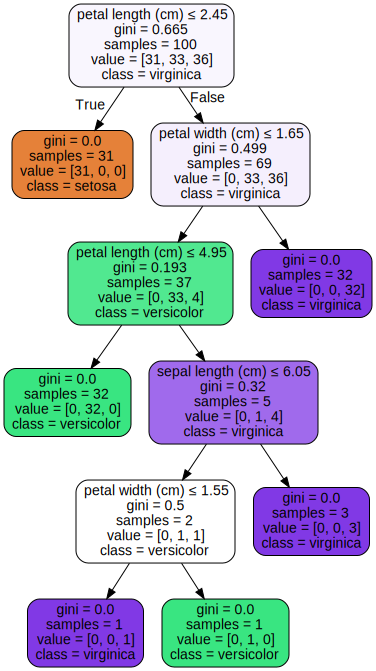

In [10]:
graph = graphviz.Source(dot_data)  
graph 

### K-Nearest Neighbors

There are many other classifiers available in scikit-learn that one might use. Below we'll use a k-nearest neighbors classifier. 

  * **See:** http://scikit-learn.org/stable/modules/neighbors.html

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_x_train, iris_y_train) 
print("built-in accuracy calculation (knn):", accuracy_score(knn.predict(iris_x_test), iris_y_test))

dtree = tree.DecisionTreeClassifier()
dtree.fit(iris_x_train, iris_y_train) 
print("built-in accuracy calculation (dtree):", accuracy_score(dtree.predict(iris_x_test), iris_y_test))
print("built-in accuracy calculation (dtree), v2:", dtree.score(iris_x_test, iris_y_test))


built-in accuracy calculation (knn): 0.96
built-in accuracy calculation (dtree): 0.96
built-in accuracy calculation (dtree), v2: 0.96


## Regression

Scikit-learn also defines multiple classes for regression. 


In [12]:
diabetes = datasets.load_diabetes()
print("Diabetes data set shape: ",diabetes.data.shape)
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

Diabetes data set shape:  (442, 10)


### Orindary Least Squares Linear Regression

*  **See:** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
from sklearn import linear_model
import sklearn.metrics as metrics

regr = linear_model.LinearRegression()
# fit the data
regr.fit(diabetes_X_train, diabetes_y_train)

# print out the linear model
print("coefficients:\n", regr.coef_)

#compute predicted values on test test;
predicted = regr.predict(diabetes_X_test);

# The mean squared error
err = np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)
print("calculated error on test set:",err)
# compare result to builtin mse
print("built-in error on test set 1:", metrics.mean_squared_error(diabetes_y_test,predicted))
print("built-in error on test set 2:",regr.score(diabetes_X_test, diabetes_y_test))

coefficients:
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
calculated error on test set: 2004.5676026898211
built-in error on test set 1: 2004.5676026898211
built-in error on test set 2: 0.5850753022690574


### Other linear models:
* **See:** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [14]:
ridge_regr = linear_model.Ridge()
lasso_regr = linear_model.Lasso()
perceptron = linear_model.Perceptron()
for regr in [ridge_regr, lasso_regr,perceptron]:
    print('-'*50)
    print(regr)
    # fit the data
    regr.fit(diabetes_X_train, diabetes_y_train)
    # print out the linear model
    print("coefficients:\n", regr.coef_)
    #compute predicted values on test test;
    predicted = regr.predict(diabetes_X_test);
    # The mean squared error
    err = np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)
    print("calculated error on test set:",err)
    # compare result to builtin mse
    print("built-in error on test set:", metrics.mean_squared_error(diabetes_y_test,predicted))

--------------------------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
coefficients:
 [  34.27253573  -80.06235273  296.73036586  199.14438365    6.14639012
  -26.10294287 -150.21661191  119.4044712   254.49896275  115.68515613]
calculated error on test set: 2693.3680421776858
built-in error on test set: 2693.3680421776858
--------------------------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
coefficients:
 [  0.          -0.         357.61234402  11.57097751   0.
   0.          -0.           0.         305.62172841   0.        ]
calculated error on test set: 3037.2580917088812
built-in error on test set: 3037.2580917088812
--------------------------------------------------
Perceptron(alpha=0.0001, cl

## Cross validation

With both of the data sets above, we split the data into training and testing sets. The first is used to develop the model, and the second is used to develop it. 

Another technique for separating the datasets is **k-fold cross-validation**. Here, the data is split into $k$ folds, and the machine learning algorithm is run for $k$ iterations. In each iteration, $k-1$ folds are used to train the data, and the remaining one is ued to test. A score is calculated and stored for each fold. The performance of the algorithm is taken to be the average score over all of the iterations. 

In [15]:
from sklearn import datasets
from sklearn.model_selection import KFold
iris = datasets.load_iris()
data = iris.data[indices]
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(data):
    print(test_indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
[75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


In [16]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import  mean_squared_error as mse
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
indices = np.random.permutation(len(iris.data))

data = iris.data[indices]
target = iris.target[indices]

clf = tree.DecisionTreeClassifier()
k_fold = KFold(n_splits=10)

for train_indices, test_indices in k_fold.split(data):
    clf.fit(data[train_indices], target[train_indices]) 
    predicted = clf.predict(data[test_indices])
    clf.score
    print("targets:  ", target[test_indices])
    print("precicted:", predicted)
    print("accuracy", accuracy_score(target[test_indices], predicted))
    print("---------")

targets:   [0 2 0 2 1 2 0 1 1 1 2 1 2 0 1]
precicted: [0 2 0 2 1 2 0 1 1 1 2 1 2 0 1]
accuracy 1.0
---------
targets:   [0 0 2 1 2 0 1 0 1 1 0 0 1 0 1]
precicted: [0 0 2 1 2 0 2 0 1 1 0 0 1 0 1]
accuracy 0.9333333333333333
---------
targets:   [1 2 2 1 2 2 1 0 1 2 2 2 2 1 2]
precicted: [1 2 2 1 2 2 1 0 1 1 2 2 2 1 2]
accuracy 0.9333333333333333
---------
targets:   [0 2 0 2 1 1 2 0 0 2 0 1 2 1 0]
precicted: [0 2 0 1 1 1 2 0 0 2 0 1 2 1 0]
accuracy 0.9333333333333333
---------
targets:   [2 0 0 2 1 0 1 1 1 2 2 1 2 2 1]
precicted: [2 0 0 2 1 0 1 1 2 2 2 1 2 1 1]
accuracy 0.8666666666666667
---------
targets:   [2 1 0 0 2 2 0 2 0 0 1 1 0 2 0]
precicted: [2 1 0 0 2 2 0 2 0 0 1 1 0 2 0]
accuracy 1.0
---------
targets:   [0 0 0 2 0 1 2 0 0 1 1 2 2 0 2]
precicted: [0 0 0 1 0 1 1 0 0 1 1 2 2 0 2]
accuracy 0.8666666666666667
---------
targets:   [1 0 1 2 2 1 0 1 0 1 2 0 0 2 1]
precicted: [1 0 1 2 2 1 0 1 0 1 2 0 0 2 1]
accuracy 1.0
---------
targets:   [0 0 0 1 0 1 1 0 0 1 2 2 1 2 2]
precicted:

Above, we have manually iterated over the folds. There are more compact ways of using cross-validation.

In [17]:
from sklearn.model_selection import cross_val_score
dtree = tree.DecisionTreeClassifier()
print(cross_val_score(dtree, iris.data, iris.target,cv=10))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [18]:
k_fold = KFold(n_splits=10)
cross_val_score(dtree, iris.data, iris.target,cv=k_fold)
print(cross_val_score(dtree, iris.data, iris.target,cv=k_fold))

[1.         1.         1.         0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.73333333 1.        ]


## Using Pandas

It's also possible to use Pandas DataFrames with scikit-learn. Below, we read in the iris dataset from a csv file, permute the data, and then split it into training and testing sets. 

In [20]:
import pandas as pd
import numpy as np
import sklearn.tree as tree

# read in the data
file = '..\\data-sets\\iris.csv'
train = pd.read_csv(file)

#extract input and targets
input_attributes = ['sepallength','sepalwidth','petallength','petalwidth']
data = train.loc[:, input_attributes]
y = train.TargetClass


# permute the data and create training and testing sets.
np.random.seed(0)
offset = -50
indices = np.random.permutation(len(data))
data_train = data.iloc[indices[:offset]]
y_train = y.iloc[indices[:offset]]
data_test  = data.iloc[indices[offset:]]
y_test  = y.iloc[indices[offset:]]

# create an estimator and fit it.
dtree = tree.DecisionTreeClassifier()
dtree.fit(data_train, y_train) 

# print out some results
results = dtree.predict(data_test)
print('Instances where predicted (left) and actual (right) differ.')
for i in range(len(results)):
    if results[i] != y_test.iloc[i]:
        print(i, results[i],y_test.iloc[i])

Instances where predicted (left) and actual (right) differ.
33 Iris-virginica Iris-versicolor
41 Iris-virginica Iris-versicolor
